# Ice Cream Sales vs. Temperature
## Build a Linear Regression model using Scikit-learn

Welcome to the Linear Regression Lab! In this hands-on session, we'll explore one of the fundamental building blocks of machine learning: linear regression.

Linear regression helps us understand and predict relationships between variables, like how house prices relate to square footage or how sales might depend on advertising spend.

By the end of this lab, you'll understand how to implement linear regression using Python, visualize your data and regression lines, evaluate model performance, and make predictions with your trained model.

We'll use popular data science libraries including NumPy, Pandas, and Scikit-learn to bring these concepts to life with real-world examples.

Whether you're new to machine learning or looking to reinforce your understanding, this lab will provide you with practical experience in implementing and interpreting linear regression models.


![Image Description](https://github.com/scottalanturner/AI-ML-Labs/blob/main/Linear-Regression/images/linear-regression.png?raw=true)


![Image Description](https://github.com/scottalanturner/AI-ML-Labs/blob/main/Linear-Regression/images/ice-cream.png?raw=true)

# Import Python libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("Libraries loaded")


Libraries loaded


# Understanding Variables in Regression

In regression analysis, we examine relationships between variables. Consider the example of ice cream sales and temperature:

- Independent variable (also called regressor, explanatory, predictor, or input variable): Temperature
- Dependent variable (also called regressand, response, or output variable): Ice cream sales

The relationship appears straightforward: ice cream sales tend to increase as temperature increases.

In [23]:
sales_df = pd.read_csv('https://github.com/scottalanturner/AI-ML-Labs/blob/main/Linear-Regression/data/IceCreamData.csv?raw=true')

sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# Perform data visualization

When examining relationships between variables, we consider:

- Direction: Positive (direct) or negative (indirect) relationship
- Form: Linear or non-linear relationship
- Strength: Weak, moderate, or strong relationship
- Caution: Be aware of outliers that can distort the relationship


<Axes: xlabel='Temperature', ylabel='Revenue'>

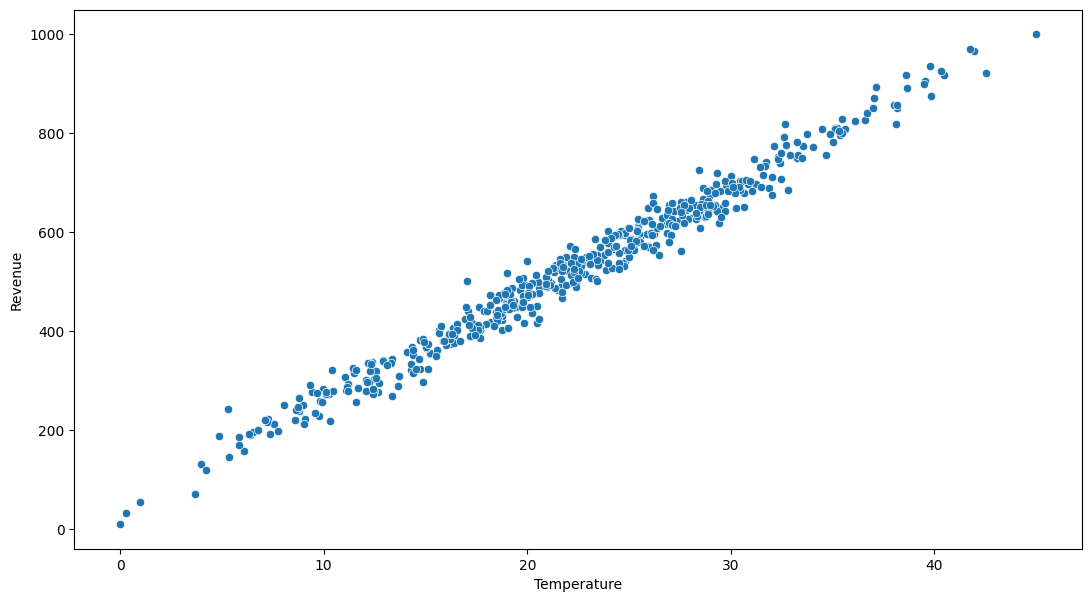

In [24]:
plt.figure(figsize = (13,7))
sns.scatterplot(x = 'Temperature', y = 'Revenue', data = sales_df)

# Simple Linear Regression
Linear regression studies linear, additive relationships between variables. Simple linear regression specifically describes the linear relationship between exactly two variables.

We fit a line to data, finding the line that "best" fits the observed data points. This allows us to:

1. Understand the relationship between variables
2. Make predictions based on this relationship

# Create training and testing datasets

We divide the data into training data that we use to build the model, and testing data that is used to evaluate how well the model performs (how good is it?)

'Good' is a relative term. There are many different ways to evaluate a model. The stake holders will define what is acceptable for a model's performance.

In [26]:
X = sales_df['Temperature'].values.reshape(-1, 1)  # Reshape to 2D array
y = sales_df['Revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the model to the training data

## The Formal Problem Statement
The regression problem can be formally stated as:

- Find the line that "best" fits the data
- More precisely: given a set of (x, y) pairs, find a line such that the squared distance between each of the points and the line is minimized
- These distances are called residuals
- The regression problem aims to minimize the sum of the squared residuals

In [27]:
# Create a Linear Regression model object with fit_intercept=True, which means the model will calculate
# the y-intercept (b) in the equation y = mx + b. This allows the regression line to start at any point,
# not just the origin.

SimpleLinearRegression = LinearRegression(fit_intercept = True)

# Train the model using the training data (X_train and y_train).
# X_train contains the input features (independent variables). In our case, temperature
# y_train contains the target values (dependent variable). In our case, sales (revenue)
# The .fit() method finds the optimal coefficients (slope and intercept) that minimize the prediction error

SimpleLinearRegression.fit(X_train, y_train)


LinearRegression()

# Evaluate the trained model

Text(0.5, 1.0, 'Revenue Generated vs Temperature')

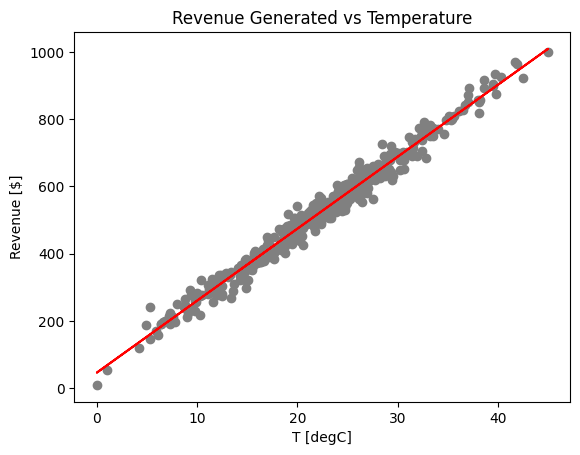

In [28]:
# This python code simply gives instructions on how to draw (plot) our data.
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Revenue Generated vs Temperature')

# Interpreting the Regression Line
For a regression line y = a + bx:

- The slope b represents the change in y for a one-unit increase in x
- The intercept a is the predicted value of y when x is zero

Note: If x never equals zero in your dataset, the intercept may lack practical meaning

Important caution: It's dangerous to make predictions outside the range of measured x values, as we don't know if the relationship holds beyond the observed data range. For example, if the lowest temperature in our ice cream data was 3 degrees, making a prediction about what the revenue will be if it's -1 degree wouldn't be reliable (a poor example in this case, given any extreme temperatures).

# Determine the accuracy of the model

In [29]:
# Calculate the R-squared (R²) score of the model using the test data
# R-squared measures how well the model fits the data, ranging from 0 to 1
# - A score of 1.0 indicates a perfect fit
# - A score of 0.0 indicates the model doesn't fit the data at all
# X_test contains the input features from the test set
# y_test contains the actual target values we're comparing against

accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)

# Print the accuracy of the model
accuracy_LinearRegression

0.9771532792713993

# Plot the predicted revenue

Let's create a scatter plot to visualize how well our linear regression model fits the data. This plot will show:

1. **Actual Data Points**: Gray dots representing our test data, where:
   - X-axis shows the temperature in degrees Celsius
   - Y-axis shows the actual revenue in dollars

2. **Regression Line**: A red line showing our model's predictions, which:
   - Represents the best-fit line calculated by our linear regression model
   - Shows the linear relationship our model found between temperature and revenue

This visualization helps us:
- See the relationship between temperature and revenue
- Assess how well our model's predictions (red line) align with the actual data points (gray dots)
- Identify any patterns or outliers in our data

The closer the gray dots are to the red line, the better our model is at predicting revenue based on temperature. Any significant deviations from the line might indicate areas where our model's predictions are less accurate.

Text(0.5, 1.0, 'Predicted Revenue vs Temperature')

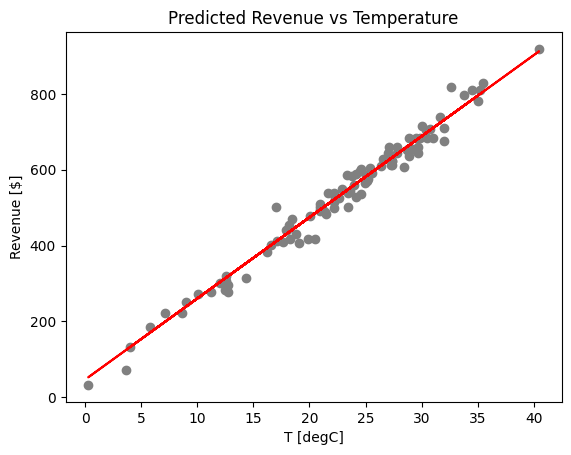

In [30]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Predicted Revenue vs Temperature')

# Predict the revenue for a given temperature

Now that we have trained our linear regression model, we can use it to predict revenue for any given temperature. The function `predict_revenue()` makes this easy - simply input a temperature in Celsius, and it will return the predicted revenue in dollars.

Try it yourself! Change the temperature value and run the cell to see how the predicted revenue changes. For example:
- What revenue would you expect on a hot summer day (30°C)?
- How about during a cool spring morning (15°C)?
- What about during winter (5°C)?

This practical application shows how our model can help business planning by estimating revenue based on weather forecasts. Or, produce the right amount of ice cream for the day to handle the predicted demand.

In [31]:
def predict_revenue(temperature):
    # Reshape the single temperature value into a 2D array
    temp_2d = np.array(temperature).reshape(-1, 1)

    # Make the prediction using the global model
    predicted_revenue = SimpleLinearRegression.predict(temp_2d)

    # Print the result
    print(f"Temperature: {temperature}°C")
    print(f"Predicted Revenue: ${predicted_revenue[0]:.2f}")

    return predicted_revenue[0]

# Example usage:

# Change the temperature in Celsius, then run the cell to see the predicted revenue

temperature = 24
predict_revenue(temperature)

Temperature: 24°C
Predicted Revenue: $559.97


np.float64(559.972013804505)